<a href="https://colab.research.google.com/github/AmirKhan6219/Credit-Card-Default-Prediction/blob/main/Credit_Card_Default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data= pd.read_excel('/content/drive/MyDrive/Alma Better/AlmaBetter CapstoneProject/Credit Card Default Prediction/default of credit card clients.xlsx')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


Let's information about dataset.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

* We have 30,000 entries and we don't have any missing value in our dataset.

Check number of rows and columns in our dataset.

In [18]:
data.shape

(30000, 25)

* We have 30,000 rows and 25 columns.

Checking the Null values.

In [19]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

# **Exploratory data Analysis**

# **Univariate Analysis**

**Dependent Variable (default payment next month)**

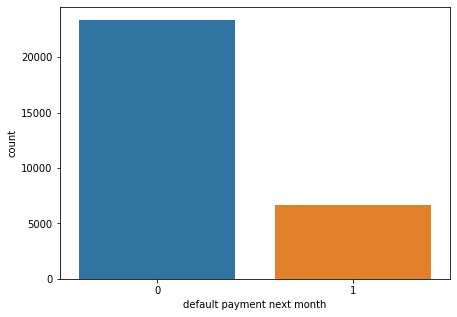

In [20]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'default payment next month', data = data)
plt.show()

**Independent Variable**

**Limit Balance**

In [21]:
data['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
800000        2
760000        1
690000        1
1000000       1
327680        1
Name: LIMIT_BAL, Length: 81, dtype: int64

Checking the destribution of Limit Balance.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


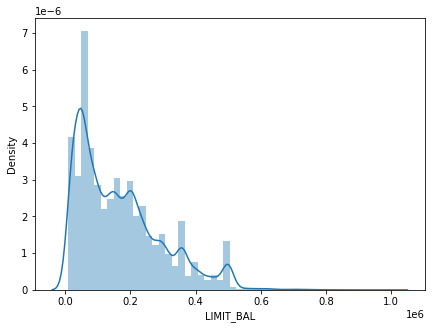

In [22]:
plt.figure(figsize=(7,5))
sns.distplot(data['LIMIT_BAL'], kde=True)
plt.show()

**SEX**

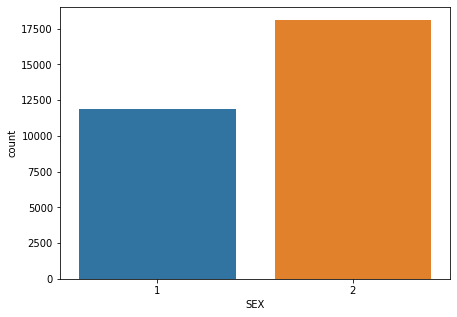

In [23]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'SEX', data = data)
plt.show()

* We can see from above graph that number of Male credit holder is less than Female.

**Marriage**

In [24]:
data["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

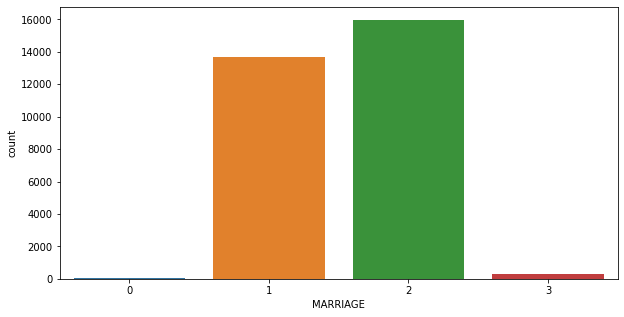

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'MARRIAGE', data = data)
plt.show()

* More number of credit cards holder are Single.

**Age**

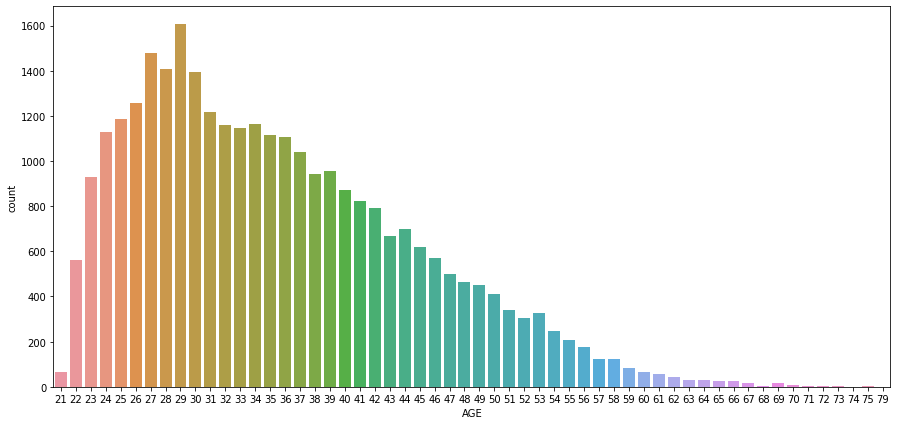

In [26]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'AGE', data = data)
plt.show()

* Age above 60 years old rarely uses the credit card.
* More number of credit cards holder age are between 26-30 years old.

**Limit Balance**

In [27]:
data['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
800000        2
760000        1
690000        1
1000000       1
327680        1
Name: LIMIT_BAL, Length: 81, dtype: int64

* Maximum amount of given credit in NT dollars is 50,000 followed by 30,000 and 20,000.

**Column Renaming**

In [29]:
data = data.rename(columns={'default payment next month': 'def_pay', 'PAY_0': 'PAY_1'})
data.rename(columns={'PAY_1':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
data.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
data.rename(columns={'PAY_AMT6':'PAY_AMT_MAR','PAY_AMT1':'PAY_AMT_AUG','PAY_AMT2':'PAY_AMT_JUL','PAY_AMT3':'PAY_AMT_JUN','PAY_AMT4':'PAY_AMT_MAY','PAY_AMT5':'PAY_AMT_APR'},inplace=True)

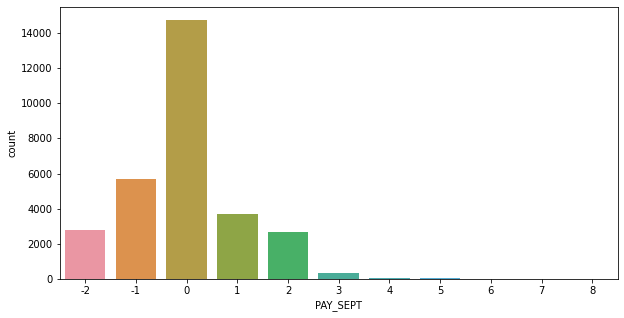

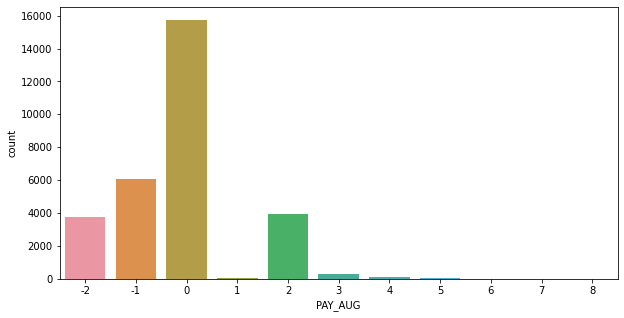

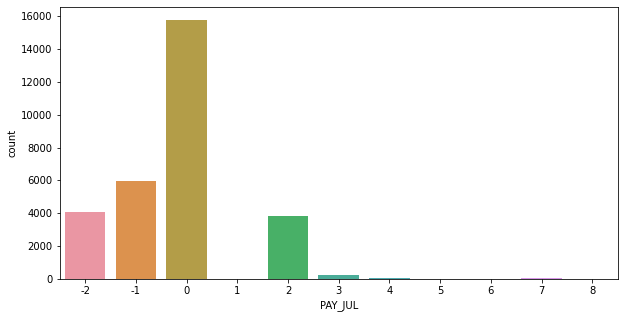

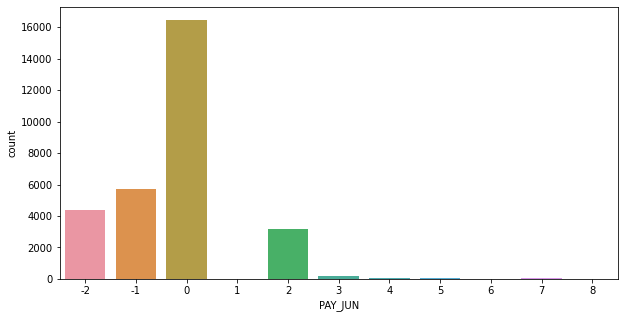

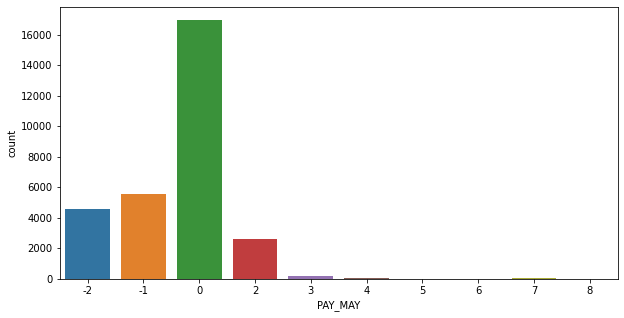

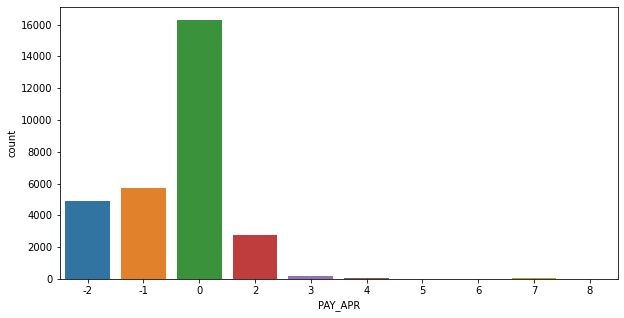

In [30]:
payment = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for col in payment:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, data = data)